
Bayes classification

importing the data file

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator 
data = pd.read_csv('/content/titanic.csv')
data

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


Pre Processing the data

dropping the irrelevant data

In [ ]:
data_n=data.drop(['PassengerId','Name','Cabin','Ticket'],axis='columns')

In [ ]:
data_n

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,1
888,3,female,NaN,23.4500,S,0
889,1,male,26.0,30.0000,C,1


label encoding the data

In [ ]:
data_n['Sex'] = data_n['Sex'].replace(["female", "male"], [0, 1])
data_n['Embarked'] = data_n['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
data_n['Age'] = pd.qcut(data_n['Age'], 10, labels=False)

In [ ]:
data_n

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,2.0,7.2500,1.0,0
1,1,0,7.0,71.2833,2.0,1
2,3,0,4.0,7.9250,1.0,1
3,1,0,6.0,53.1000,1.0,1
4,3,1,6.0,8.0500,1.0,0
...,...,...,...,...,...,...
886,2,1,4.0,13.0000,1.0,0
887,1,0,1.0,30.0000,1.0,1
888,3,0,NaN,23.4500,1.0,0
889,1,1,4.0,30.0000,2.0,1


dropping the fields which have nan

In [ ]:
data_n=data_n.dropna()

normalizing the data

In [ ]:
df = data_n.copy()
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max()
display(df)

,Pclass,Sex,Age,Fare,Embarked,Survived
0,1.000000,1.0,0.222222,0.014151,0.333333,0.0
1,0.333333,0.0,0.777778,0.139136,0.666667,1.0
2,1.000000,0.0,0.444444,0.015469,0.333333,1.0
3,0.333333,0.0,0.666667,0.103644,0.333333,1.0
4,1.000000,1.0,0.666667,0.015713,0.333333,0.0
...,...,...,...,...,...,...
885,1.000000,0.0,0.777778,0.056848,1.000000,0.0
886,0.666667,1.0,0.444444,0.025374,0.333333,0.0
887,0.333333,0.0,0.111111,0.058556,0.333333,1.0
889,0.333333,1.0,0.444444,0.058556,0.666667,1.0


visualizing the data as heatmap

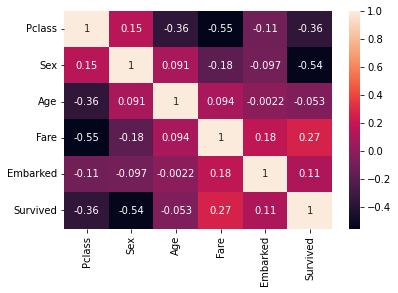

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr() ,annot = True)

In [ ]:
#sns.pairplot(df,hue="Survived")  
#plt.show() 

dividing the data in test and train sets

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2)
X_train = train.values[:, 0:5]; 
y_train = train.values[:,5:6];
y_test = test.values[:,5:6]
X_test = test.values[:, 0:5]

Gaussian naive bayes classifier from scratch

In [ ]:
class NBC():
  def __init__(self,df,prob = list()):
    self.df = df
    self.prob = prob
    self.attributes = list(self.df.columns)
  
  def prior(self,Y):
    prior = []
    uniq = sorted(list(self.df[Y].unique()))
    for i in uniq:
      a = len(self.df[self.df[Y]==i]) / len(self.df)
      prior.append(a)
    return prior

  def GNB(self, X, Y):
    y_pred = []
    attributes = self.attributes[:-1]
    m=len(attributes)
    prior_p = self.prior(Y)
    for x in X:
      uni = sorted(list(self.df[Y].unique()))
      n= len(uni)
      posterior_prob = [1]*n
      likelihood = [1]*n
      for i in range(n-2):
        for j in range(m):
          likelihood[j] = (likelihood[j])*(self.likelihood(attributes[j], x[j], Y, uni[i]))
      for i in range(n):
          posterior_prob[i] = likelihood[i] * prior_p[i]
      a=np.argmax(posterior_prob)
      y_pred.append(a)
      self.prob.append(posterior_prob[a])
    return np.array(y_pred)

  def likelihood(self,att,X,Y,a):
    mean = self.df[att].mean()
    std = self.df[att].std()
    cond_prob = (1/(np.sqrt(2 * np.pi)*std)) *  np.exp(-((X-mean)**2 / (2 * std**2 )))
    return cond_prob

def performance(y_pred,Y):
  count=0
  for i in range(len(y_pred)):
    if(y_pred[i]!=Y[i]):
      count = count+1
      s= (143-count)/143*100 
  return s

a=NBC(train)
y_pred=a.GNB(X_test,Y='Survived')
t= performance(y_pred,y_test)
print("the accuracy of the model is: ",t)

the accuracy of the model is:  57.34265734265735


5 fold cross validation

accuracy for 5 fold cross validation is:  [66.43356643356644, 67.83216783216784, 73.42657342657343, 69.23076923076923, 64.33566433566433]


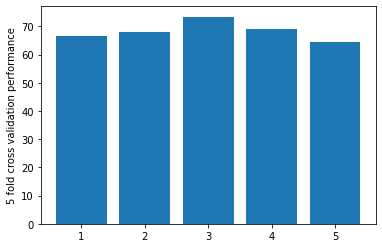

the avg performance of the model is:  68.25174825174825


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_folds = KFold(n_splits=5)
acc=[]
for train_n, test_n in k_folds.split(train):
  train_t = train.iloc[train_n]
  test_t = train.iloc[test_n]
  y_test = test_t.values[:,5:6]
  X_test = test_t.values[:, 0:5]
  a = NBC(train_t)
  y_pred = a.GNB( X=X_test,Y='Survived')
  acc.append(performance(y_pred,y_test))
print("accuracy for 5 fold cross validation is: ", acc)
p = [1,2,3,4,5]
plt.bar(p,acc)
plt.ylabel("5 fold cross validation performance")
plt.show()
mean= (sum(acc) / len(acc))

print("the avg performance of the model is: ",mean)

comparision with the scklearn model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Gaussian Naive Bayes inbuilt function performance: ", 100*nb.score(X_test, y_test))

Gaussian Naive Bayes inbuilt function performance:  78.76106194690266


implementing the decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(max_depth=7,random_state = 100)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
kfold_train_score = cross_val_score(classifier,X_train,y_train,scoring='average_precision',cv=5)
kfold_test_score = cross_val_score(classifier,X_test,y_test,scoring='average_precision',cv=5)
print("kfold test scores of Decision tree regressor are",kfold_test_score)
print("The avg performance of Decision tree regressor is",kfold_test_score.mean())

kfold test scores of Decision tree regressor are [0.79806763 0.65243271 0.54512516 0.63181818 0.53977273]
The avg performance of Decision tree regressor is 0.6334432837693708


Question 2:

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/dataset.txt', sep= '\t', header= None,names=['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient',
                      'lengthOfKernelGroove','Class'])
df

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [ ]:
df=df.dropna()
df

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [ ]:
df_n = df.copy()
cols=['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient','lengthOfKernelGroove']
for column in cols:
    df_n[column] = df_n[column]  / df_n[column].abs().max()
display(df_n)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,Class
0,0.720491,0.860290,0.948492,0.863371,0.821225,0.267108,0.796947,1.0
1,0.702550,0.844638,0.959490,0.832060,0.826432,0.122429,0.756641,1.0
2,0.674693,0.816812,0.985517,0.792659,0.827424,0.324594,0.736641,1.0
3,0.653447,0.808116,0.975172,0.797603,0.837838,0.271678,0.733588,1.0
4,0.762040,0.868986,0.983774,0.847640,0.883213,0.162959,0.790076,1.0
...,...,...,...,...,...,...,...,...
205,0.575543,0.765217,0.956441,0.769588,0.739152,0.436681,0.743511,3.0
206,0.530217,0.746667,0.926821,0.770037,0.693032,0.520144,0.763817,3.0
207,0.623229,0.791884,0.967331,0.784419,0.801389,1.000000,0.771908,3.0
208,0.559018,0.765797,0.927910,0.775281,0.703199,0.432712,0.770076,3.0


Histogram plot to show the distribution of data

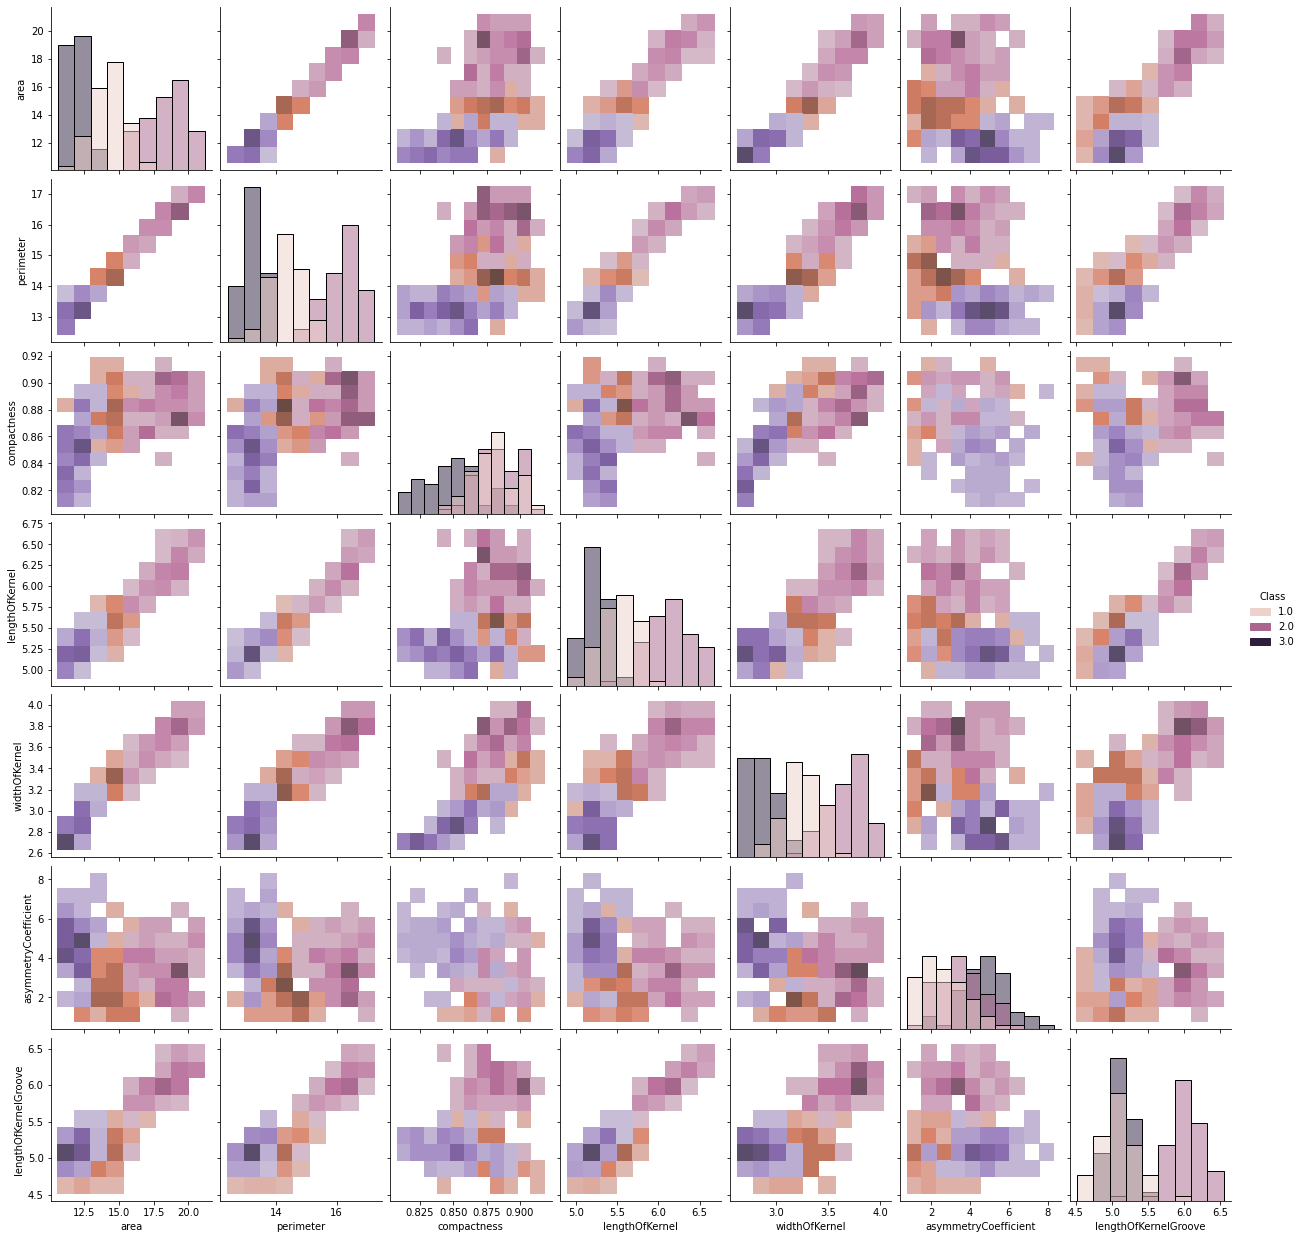

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue="Class",kind='hist')  
plt.show() 

Prior Probability

In [ ]:
def prior(Y,df):
    prior = []
    uniq = sorted(list(df[Y].unique()))
    for i in uniq:
      a = len(df[df[Y]==i]) / len(df)
      prior.append(a)
    return prior
    
for i in range(3):
  print("prior probability of class ",(i+1)," is: ",prior('Class',df)[i])

prior probability of class  1  is:  0.3316582914572864
prior probability of class  2  is:  0.3417085427135678
prior probability of class  3  is:  0.32663316582914576


In [ ]:
def bins(Y):
  arr = df_n[Y].to_numpy()
  for i in range(len(arr)):
    if ( arr[i] > 0.8):
      arr[i] = 5
    elif(arr[i] > 0.6):
      arr[i] = 4
    elif(arr[i] > 0.4):
      arr[i] = 3
    elif(arr[i] > 0.2):
      arr[i] = 2
    else:
      arr[i] = 1
  return

bins('area')
bins('perimeter')
bins('compactness')
bins('lengthOfKernel')
bins('widthOfKernel')
bins('asymmetryCoefficient')
bins('lengthOfKernelGroove')

df_n

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,Class
0,4.0,5.0,5.0,5.0,5.0,2.0,4.0,1.0
1,4.0,5.0,5.0,5.0,5.0,1.0,4.0,1.0
2,4.0,5.0,5.0,4.0,5.0,2.0,4.0,1.0
3,4.0,5.0,5.0,4.0,5.0,2.0,4.0,1.0
4,4.0,5.0,5.0,5.0,5.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...
205,3.0,4.0,5.0,4.0,4.0,3.0,4.0,3.0
206,3.0,4.0,5.0,4.0,4.0,3.0,4.0,3.0
207,4.0,4.0,5.0,4.0,5.0,5.0,4.0,3.0
208,3.0,4.0,5.0,4.0,4.0,3.0,4.0,3.0


Determining the likelihood/class conditional probabilities for all the classes.

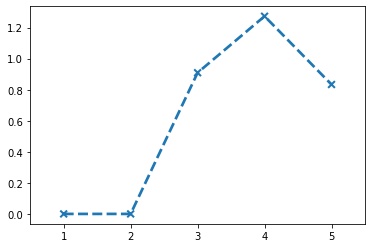

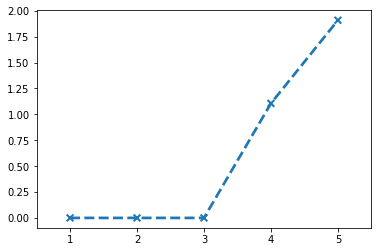

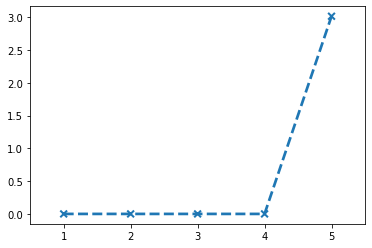

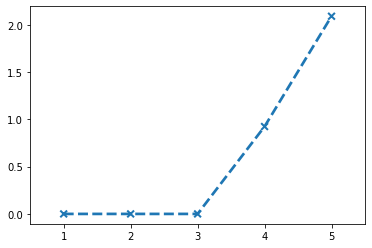

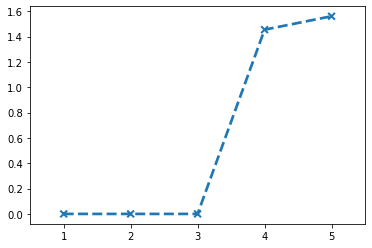

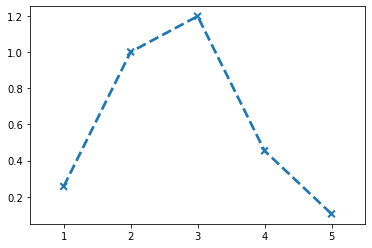

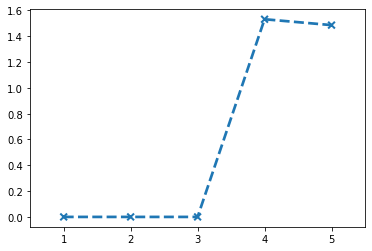

array([0.        , 0.        , 0.        , 1.53030303, 1.48484848])

In [ ]:
def likelihood(df_n,Y):
  arr = df_n['Class'].to_numpy()
  c1=0
  c2=0
  c3=0
  count1=0
  count2=0
  count3=0
  count4=0
  count5=0

  for i in arr:
    if(i==1):
      c1=c1+1
    elif(i==2):
      c2=c2+1
    else:
      c3=c3+1
  
  arr2 = df_n[Y].to_numpy()
  for i in arr2:
    if(i==1):
      count1=count1+1
    elif(i==2):
      count2=count2+1
    elif(i==3):
      count3=count3+1
    elif(i==4):
      count4=count4+1
    elif(i==5):
      count5=count5+1

  count_unique_c1=[count1,count2,count3,count4,count5]
  y1 = np.array(count_unique_c1)/c1
  sns.pointplot([1,2,3,4,5],y1, linestyles="--",markers =['x'] )
  plt.show()
  return y1

likelihood(df_n,'area')
likelihood(df_n,'perimeter')
likelihood(df_n,'compactness')
likelihood(df_n,'lengthOfKernel')
likelihood(df_n,'widthOfKernel')
likelihood(df_n,'asymmetryCoefficient')
likelihood(df_n,'lengthOfKernelGroove')

Plotting unique element of each feature


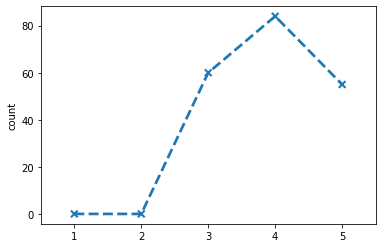

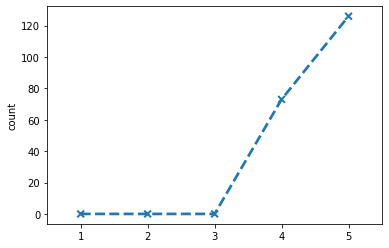

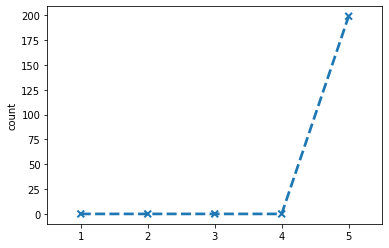

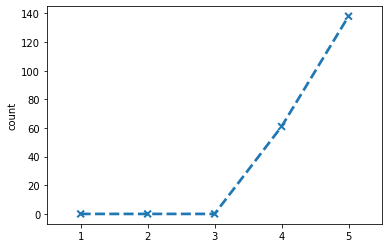

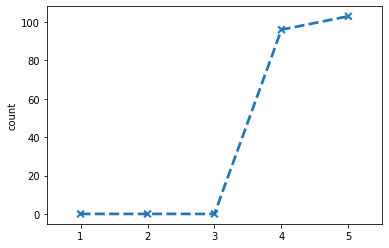

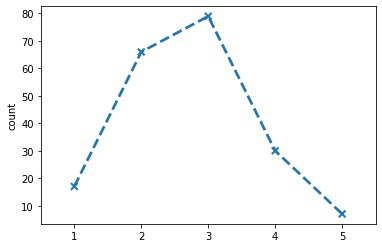

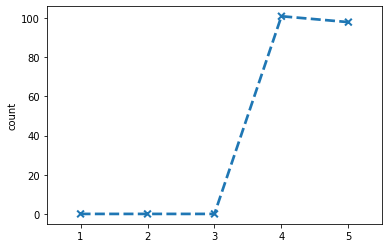

In [ ]:
def unique_plot(df_n,Y):
  arr = df_n['Class'].to_numpy()
  c1=0
  c2=0
  c3=0
  count1=0
  count2=0
  count3=0
  count4=0
  count5=0

  for i in arr:
    if(i==1):
      c1=c1+1
    elif(i==2):
      c2=c2+1
    else:
      c3=c3+1
  
  arr2 = df_n[Y].to_numpy()
  for i in arr2:
    if(i==1):
      count1=count1+1
    elif(i==2):
      count2=count2+1
    elif(i==3):
      count3=count3+1
    elif(i==4):
      count4=count4+1
    elif(i==5):
      count5=count5+1

  count_unique_c1=[count1,count2,count3,count4,count5]
  sns.pointplot([1,2,3,4,5],count_unique_c1, linestyles="--",markers =['x'])
  plt.ylabel("count")
  plt.show()

unique_plot(df_n,'area')
unique_plot(df_n,'perimeter')
unique_plot(df_n,'compactness')
unique_plot(df_n,'lengthOfKernel')
unique_plot(df_n,'widthOfKernel')
unique_plot(df_n,'asymmetryCoefficient')
unique_plot(df_n,'lengthOfKernelGroove')

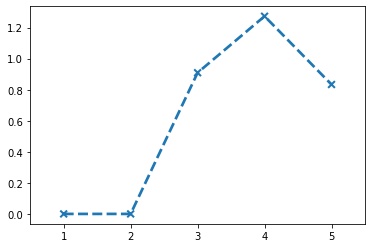

[array([0.        , 0.        , 0.27409776, 0.38373687, 0.25125628]),
 array([0.        , 0.        , 0.38373687, 0.53723161, 0.35175879]),
 array([0.        , 0.        , 0.25125628, 0.35175879, 0.23031826])]

In [ ]:
def posterior_prob(df_n,Y):
  y1=[]
  prob_c1=[]
  p_1=[]
  post=[]
  y1 = likelihood(df_n,Y)
  for i in range(3):
    prob_c0=prior(Y,df_n)[i]
    p_1= y1 * prob_c0
    post.append(p_1)
  return post

posterior_prob(df_n,'area')